# Recommender system

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

## 1.1  Movielens full - EDA

- a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan, utan försök undersöka fler aspekter av datan. 

In [5]:
#load data and get some info about it
movies = pd.read_csv("Data/movies.csv")
ratings= pd.read_csv("C:/Users/Amal Derbali/Documents/ratings.csv")

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [8]:
#try to list all genres existed in the list

Genre_list=[]
for genres in movies["genres"].unique(): #get unique genre from the list and avoid repetition
        Genre_list.extend(genres.split("|"))
Genre_list= set(Genre_list) #set the list
Genre_list

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [9]:
#try count the number of films in every genre
num_per_genre=movies['genres'].groupby(movies['genres']).count()
num_per_genre

genres
(no genres listed)                     4266
Action                                  531
Action|Adventure                        195
Action|Adventure|Animation               37
Action|Adventure|Animation|Children      12
                                       ... 
Thriller|War                             13
Thriller|Western                          5
War                                      82
War|Western                               6
Western                                 551
Name: genres, Length: 1643, dtype: int64

- b) Vilka är de 10 filmerna med flest ratings?

In [10]:
ratings_by_title=ratings.merge(movies, on='movieId') #use merge to put titles and ratings at the same data
ratings_by_title

,userId,movieId,rating,timestamp,title,genres
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
...,...,...,...,...,...,...
27753439,282403,167894,1.0,1524243885,Stranglehold (1994),Action
27753440,282732,161572,3.5,1504408070,The Great Houdini (1976),Drama
27753441,283000,117857,3.5,1417317969,Hotline (2014),Documentary
27753442,283000,133409,3.5,1431539331,Barnum! (1986),(no genres listed)


In [11]:
Top_ratings= ratings_by_title.groupby('title').size().sort_values(ascending=False)[:10]
Top_ratings

title
Shawshank Redemption, The (1994)             97999
Forrest Gump (1994)                          97040
Pulp Fiction (1994)                          92406
Silence of the Lambs, The (1991)             87899
Matrix, The (1999)                           84545
Star Wars: Episode IV - A New Hope (1977)    81815
Jurassic Park (1993)                         76451
Schindler's List (1993)                      71516
Braveheart (1995)                            68803
Toy Story (1995)                             68469
dtype: int64

- c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

In [30]:
# get mean of ratings for top 10 movies
mean= ratings_by_title.groupby(ratings_by_title["title"]).mean()
mean_= mean.loc[Top_ratings.index] # set rows by loc and get titles of the top rated movies by index
mean_

C:\Users\Amal Derbali\AppData\Local\Temp\ipykernel_16684\323069452.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean= ratings_by_title.groupby(ratings_by_title["title"]).mean()


,userId,movieId,rating,timestamp
title,,,,
"Shawshank Redemption, The (1994)",141676.622200,318.0,4.424188,1.197194e+09
Forrest Gump (1994),142083.137758,356.0,4.056585,1.158965e+09
Pulp Fiction (1994),141921.386512,296.0,4.173971,1.133180e+09
"Silence of the Lambs, The (1991)",141652.898179,593.0,4.151412,1.132010e+09
"Matrix, The (1999)",141924.163250,2571.0,4.149695,1.273273e+09
Star Wars: Episode IV - A New Hope (1977),141643.320345,260.0,4.120455,1.174434e+09
Jurassic Park (1993),141858.496292,480.0,3.665034,1.099715e+09
Schindler's List (1993),141596.401253,527.0,4.257502,1.164271e+09
Braveheart (1995),141808.180326,110.0,4.008481,1.109816e+09


- d) Gör en plot över årtal och antalet filmer representerade i datasettet.

In [13]:
# add year column to the data
movies["year"]= movies["title"].str.extract(r"(\d+)") # extracting data based on : https://community.dataquest.io/t/str-extract-r-d-what-does-d-mean/506096
movies["year"]= movies["title"].str.extract(r".*\((.*)\)")
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011
58095,193880,Her Name Was Mumu (2016),Drama,2016
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017


In [14]:
#create a plot of movies per year
movies_yr=movies.groupby("year").count()
movies_yr

,movieId,title,genres
year,,,
1874,1,1,1
1878,1,1,1
1883,1,1,1
1887,1,1,1
1888,4,4,4
...,...,...,...
2018,861,861,861
"Bicicleta, cullera, poma",1,1,1
Close Relations,1,1,1


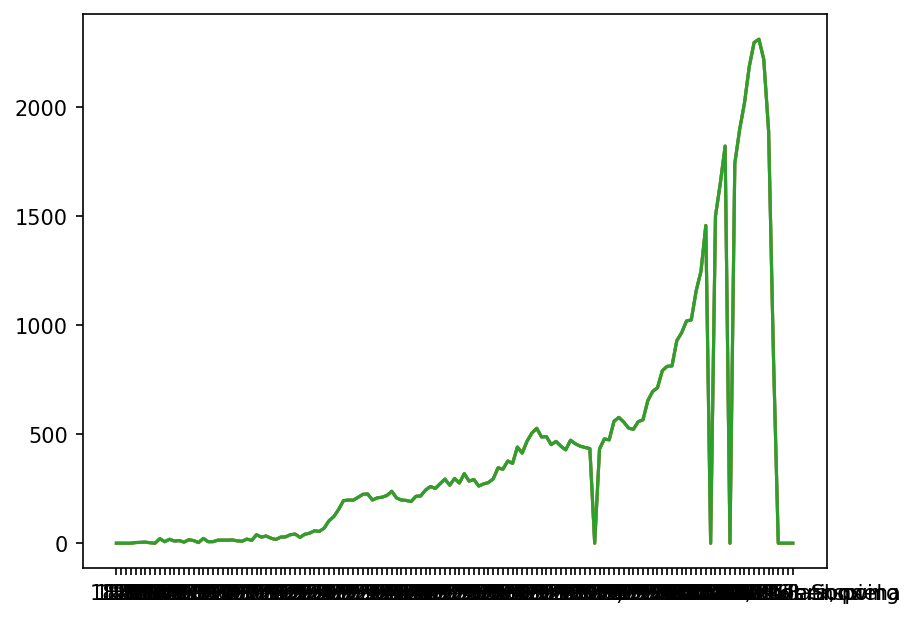

In [15]:
plt.figure(dpi=150)
plt.plot(movies_yr)


- e) Gör en plot över antalet ratings mot movieId

In [16]:
movies_rating= ratings.groupby('rating').count() #count nb of movies depending on rating value
movies_rating

,userId,movieId,timestamp
rating,,,
0.5,442388,442388,442388
1.0,886233,886233,886233
1.5,441354,441354,441354
2.0,1850627,1850627,1850627
2.5,1373419,1373419,1373419
3.0,5515668,5515668,5515668
3.5,3404360,3404360,3404360
4.0,7394710,7394710,7394710
4.5,2373550,2373550,2373550


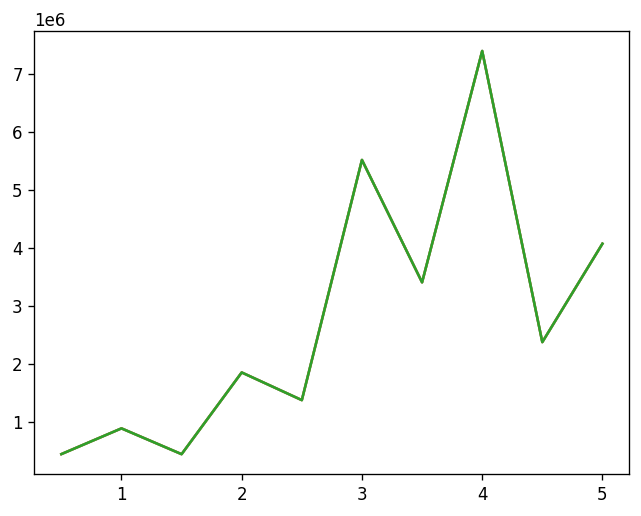

In [17]:
plt.figure(dpi=120)
plt.plot(movies_rating)

- f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över dessa.

<AxesSubplot: xlabel='rating', ylabel='title'>

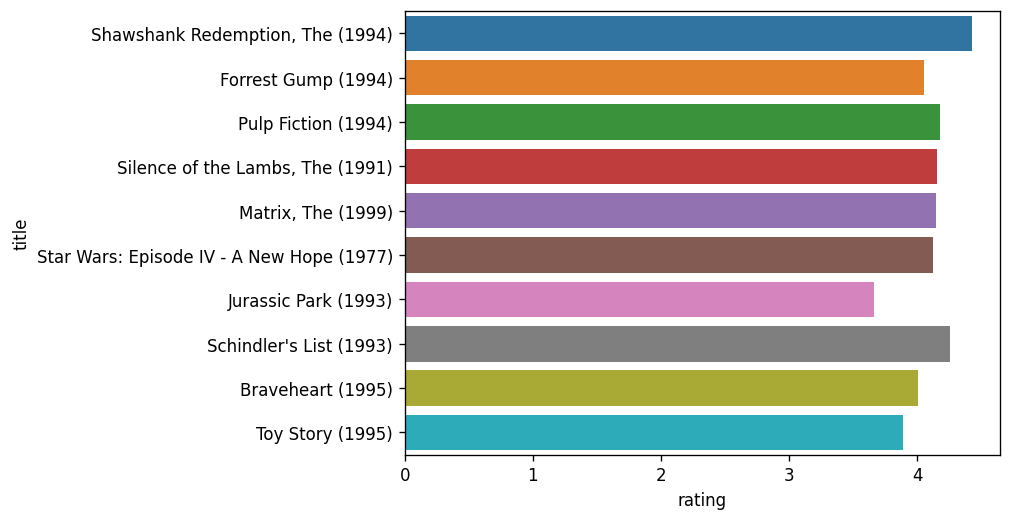

In [32]:
plt.figure(dpi=120)
sns.barplot(data=mean_, x='rating', y=mean_.index)

## 1.2 Skapa gles matris

To avoid being slow and inefficient, sparse data is more easily compressed and so requires significantly less storage.
I will try first to filter the data.
I think the most important thing to check for choosing a movie is popularity. so I will build my filtration based on number of ratings and I will exclude movies that are not popular. Then, I can get only significant data.

In [19]:

nb_rating= ratings.groupby('movieId').count().reset_index()
nb_rating.describe()

,movieId,userId,rating,timestamp
count,53889.000000,53889.000000,53889.000000,53889.000000
mean,109110.137950,515.011301,515.011301,515.011301
std,60910.551686,2934.758939,2934.758939,2934.758939
min,1.000000,1.000000,1.000000,1.000000
25%,66310.000000,2.000000,2.000000,2.000000
50%,123105.000000,7.000000,7.000000,7.000000
75%,160770.000000,48.000000,48.000000,48.000000
max,193886.000000,97999.000000,97999.000000,97999.000000


Based on the decription, I found that 75% of the movies are rated 48 times or less so I will remove them. I will get only the most rated movies.

In [34]:
top_rating=nb_rating[nb_rating['rating'] > 48].drop(columns='timestamp')
top_rating

,movieId,userId,rating
0,1,68469,68469
1,2,27143,27143
2,3,15585,15585
3,4,2989,2989
4,5,15474,15474
...,...,...,...
52943,191367,51,51
53082,191799,100,100
53156,191999,48,48
53277,192283,110,110


In [35]:
# ref: https://codingnomads.co/blog/data-analysis-example-analyzing-movie-ratings-with-python/
# add pivot table : https://www.youtube.com/watch?v=4Ws0oPH350U
top_movies_pivot= top_rating.pivot(index='movieId', columns='userId', values='rating').fillna(0) 
top_movies_pivot

userId,48,49,50,51,52,53,54,55,56,57,...,68469,68803,71516,76451,81815,84545,87899,92406,97040,97999
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68469.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191367,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191999,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# get list of movies titles that I selected after filtration of data
top_movies_list= movies.loc[movies['movieId'].isin(top_rating['movieId'])].reset_index(drop=True)
top_movies_list

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
13529,191367,The Predator (2018),Action|Adventure|Horror|Sci-Fi,2018
13530,191799,Extinction (2018),Sci-Fi,2018
13531,191999,The Reichenbach Fall (2012),Crime|Drama|Mystery,2012
13532,192283,Crazy Rich Asians (2018),Comedy,2018


In [43]:
# gles matris
from scipy.sparse import csr_matrix

movies_sparse_matrix= csr_matrix(top_movies_pivot.values)
movies_sparse_matrix
print(movies_sparse_matrix)

  (0, 3890)	68469.0
  (1, 3765)	27143.0
  (2, 3544)	15585.0
  (3, 2099)	2989.0
  (4, 3536)	15474.0
  (5, 3776)	28683.0
  (6, 3527)	15301.0
  (7, 1356)	1539.0
  (8, 2496)	4449.0
  (9, 3808)	33086.0
  (10, 3656)	19669.0
  (11, 2508)	4524.0
  (12, 1639)	1952.0
  (13, 2906)	6838.0
  (14, 2156)	3154.0
  (15, 3684)	21165.0
  (16, 3728)	24552.0
  (17, 2828)	6255.0
  (18, 3733)	24913.0
  (19, 2537)	4658.0
  (20, 3743)	25699.0
  (21, 3313)	11136.0
  (22, 2582)	4871.0
  (23, 3146)	9191.0
  (24, 3732)	24841.0
  :	:
  (13509, 24)	72.0
  (13510, 343)	391.0
  (13511, 3)	51.0
  (13512, 24)	72.0
  (13513, 6)	54.0
  (13514, 8)	56.0
  (13515, 4)	52.0
  (13516, 52)	100.0
  (13517, 93)	141.0
  (13518, 70)	118.0
  (13519, 173)	221.0
  (13520, 351)	399.0
  (13521, 233)	281.0
  (13522, 3)	51.0
  (13523, 99)	147.0
  (13524, 11)	59.0
  (13525, 10)	58.0
  (13526, 6)	54.0
  (13527, 5)	53.0
  (13528, 62)	110.0
  (13529, 3)	51.0
  (13530, 52)	100.0
  (13531, 0)	48.0
  (13532, 62)	110.0
  (13533, 34)	82.0


# 1.3 Recommenderarsystemet

Skapa rekommenderar systemet med KNN och låt systemet ta input från användaren och skriva ut top 5 rekommenderade filmerna, baserat på användarens sökquery. Notera att det inte gör något för den här labben om du tycker rekommendationerna är helt felaktiga, det här systemet vi bygger är alldeles för enkelt.

This part is refered to https://www.youtube.com/watch?v=4Ws0oPH350U.
Based on the movies name, the recommendation uses KNN.

In [38]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

In [39]:
# try to fit the data according to the model 
# Cosine similarity measures the similarity between vectors related to movies
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(movies_sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [44]:
# this model is aimed to give the list of movies recommended based on a selected movie.
def recommender(movie_name, data, model, n_recommendations):
    '''
    movie_name:str, the given movie 
    n_recommendations: int, number of recommended movies 
    
    '''
    model.fit(data)
    #get the index for the selected movie and apply a string matching based on fuzzy process
    idx = process.extractOne(movie_name, top_movies_list['title'])[2] 
    print('Movie Selected: ',top_movies_list['title'][idx], 'Index: ',idx)
    print('Based on the selected movie, this is a list of movies that is recommended for you:')
    distances, indices=model.kneighbors(data[idx], n_neighbors=(n_recommendations))#get the nearest neighbors
    for i in indices:
        print(top_movies_list['title'][i].where(i!=idx))
    

In [45]:
recommender("Forrest Gump", movies_sparse_matrix, model_knn, 6)

Movie Selected:  Forrest Gump (1994) Index:  344
Based on the selected movie, this is a list of movies that is recommended for you:
344                                     NaN
9022     Four Minutes (Vier Minuten) (2006)
9021        Valet, The (La doublure) (2006)
9023      Night of the Generals, The (1967)
9019     Amateurs, The (Moguls, The) (2005)
9024    In Search of a Midnight Kiss (2007)
Name: title, dtype: object


In [46]:
recommender("To All the Boys I've Loved Before", movies_sparse_matrix, model_knn, 6)

Movie Selected:  To All the Boys I've Loved Before (2018) Index:  13528
Based on the selected movie, this is a list of movies that is recommended for you:
11630                  Hijacking, A (Kapringen) (2012)
7572     Heart in Winter, A (Un coeur en hiver) (1992)
11372                                  10 Years (2011)
5410                         I'm All Right Jack (1959)
8069             Taste of Tea, The (Cha no aji) (2004)
7534                                 Krays, The (1990)
Name: title, dtype: object


As I can see, I think the system recommends everytime movies that is related to the chosen one based on popularity.